## SIGNATE Biginners 02

In [1]:
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

%matplotlib inline

import check_miss_value as chv

Using TensorFlow backend.


In [2]:
train_pd = pd.read_csv('../000_data/train.csv')
test_pd = pd.read_csv('../000_data/test.csv')

In [3]:
train_pd.shape, test_pd.shape

((850, 11), (350, 10))

In [4]:
train_pd.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000


In [5]:
test_pd.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,46.702857,1.631854,0.566151,282.234056,32.363521,61.545428,7.089375,3.561579,1.154658
std,16.166318,2.857160,1.746409,201.307440,83.888397,114.916494,0.877987,0.607376,0.248094
min,6.000000,0.610073,0.053853,175.747532,7.862773,11.278741,4.970108,2.296308,0.668751
25%,32.000000,0.787081,0.147714,214.211425,13.551174,20.842910,6.725417,3.128234,1.008996
50%,48.000000,0.845039,0.193881,220.738618,16.449139,25.971274,6.931101,3.620933,1.216902
75%,61.000000,0.973743,0.236440,231.839764,22.760056,52.746083,7.553500,3.738682,1.287962
max,75.000000,27.050317,17.707907,2101.145760,860.919043,705.777170,8.752045,5.009589,1.805157


In [6]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       850 non-null    int64  
 1   Gender    850 non-null    object 
 2   T_Bil     850 non-null    float64
 3   D_Bil     850 non-null    float64
 4   ALP       850 non-null    float64
 5   ALT_GPT   850 non-null    float64
 6   AST_GOT   850 non-null    float64
 7   TP        850 non-null    float64
 8   Alb       850 non-null    float64
 9   AG_ratio  850 non-null    float64
 10  disease   850 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 73.2+ KB


In [7]:
test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       350 non-null    int64  
 1   Gender    350 non-null    object 
 2   T_Bil     350 non-null    float64
 3   D_Bil     350 non-null    float64
 4   ALP       350 non-null    float64
 5   ALT_GPT   350 non-null    float64
 6   AST_GOT   350 non-null    float64
 7   TP        350 non-null    float64
 8   Alb       350 non-null    float64
 9   AG_ratio  350 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 27.5+ KB


In [8]:
train_pd.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [9]:
test_pd.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [10]:
train_pd.corr()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,1.000000,-0.001248,-0.014136,-0.023907,-0.037906,-0.008589,-0.037754,-0.087120,-0.033220,0.024216
T_Bil,-0.001248,1.000000,0.753227,0.148064,0.219784,0.248709,-0.060230,-0.162017,-0.206122,0.357653
D_Bil,-0.014136,0.753227,1.000000,0.091924,0.184403,0.201485,0.017750,-0.089132,-0.121481,0.282316
ALP,-0.023907,0.148064,0.091924,1.000000,-0.021187,0.019047,0.025728,-0.023041,-0.159614,0.211950
ALT_GPT,-0.037906,0.219784,0.184403,-0.021187,1.000000,0.655518,-0.100572,-0.087652,0.005806,0.199239
AST_GOT,-0.008589,0.248709,0.201485,0.019047,0.655518,1.000000,-0.071592,-0.086669,-0.022277,0.316456
TP,-0.037754,-0.060230,0.017750,0.025728,-0.100572,-0.071592,1.000000,0.727319,0.270246,-0.073766
Alb,-0.087120,-0.162017,-0.089132,-0.023041,-0.087652,-0.086669,0.727319,1.000000,0.607400,-0.176602
AG_ratio,-0.033220,-0.206122,-0.121481,-0.159614,0.005806,-0.022277,0.270246,0.607400,1.000000,-0.307895
disease,0.024216,0.357653,0.282316,0.211950,0.199239,0.316456,-0.073766,-0.176602,-0.307895,1.000000


In [11]:
train_pd.corr()[train_pd.corr() > 0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,1.000000,0.753227,NaN,NaN,NaN,NaN,NaN,NaN,0.357653
D_Bil,NaN,0.753227,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,1.000000,0.655518,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,0.655518,1.000000,NaN,NaN,NaN,0.316456
TP,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.727319,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,0.727319,1.000000,0.6074,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607400,1.0000,NaN
disease,NaN,0.357653,NaN,NaN,NaN,0.316456,NaN,NaN,NaN,1.000000


In [12]:
train_pd.corr()[train_pd.corr() < -0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.307895
disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.307895,NaN


In [13]:
train_pd.corr()[['disease']]

,disease
Age,0.024216
T_Bil,0.357653
D_Bil,0.282316
ALP,0.211950
ALT_GPT,0.199239
AST_GOT,0.316456
TP,-0.073766
Alb,-0.176602
AG_ratio,-0.307895
disease,1.000000


In [14]:
train_pd.disease.value_counts()

0    472
1    378
Name: disease, dtype: int64

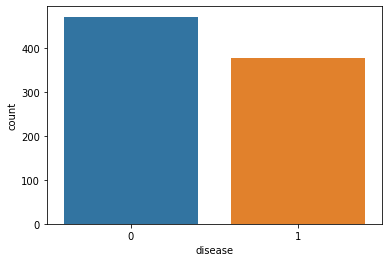

In [15]:
sns.countplot(x='disease', data=train_pd)

In [16]:
train_pd.Gender.value_counts()

Male      702
Female    148
Name: Gender, dtype: int64

In [17]:
train_pd.groupby(['disease', 'Gender'])['Gender'].count()

disease  Gender
0        Female     99
         Male      373
1        Female     49
         Male      329
Name: Gender, dtype: int64

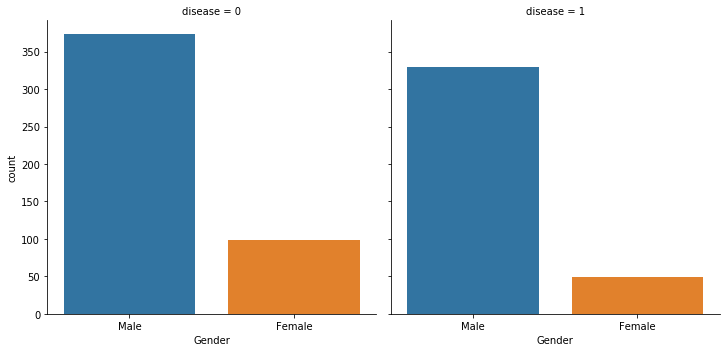

In [18]:
sns.catplot(x='Gender', col='disease', data=train_pd, kind='count')

Text(0.5, 1.0, 'disease(female)')

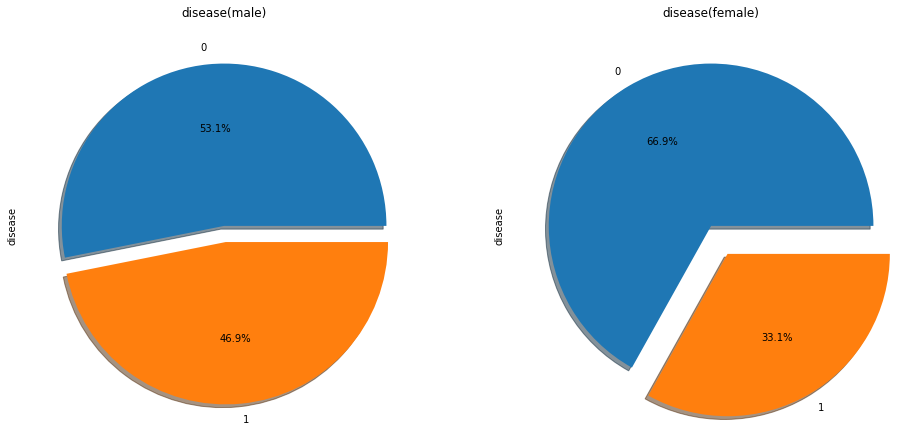

In [19]:
# 円グラフ
f, ax = plt.subplots(1, 2, figsize=(16, 8))
f.patch.set_facecolor('white')
train_pd['disease'][train_pd['Gender'] == 'Male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
train_pd['disease'][train_pd['Gender'] == 'Female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
# train_pd['disease'][train_pd['Gender'] == 'male'].value_counts().plot.pie(ax=ax[0], shadow=True)
# train_pd['disease'][train_pd['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('disease(male)')
ax[1].set_title('disease(female)')

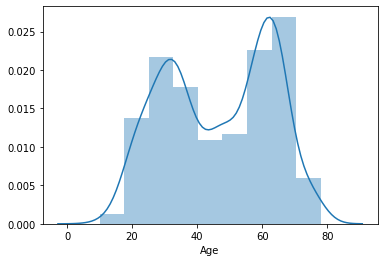

In [20]:
sns.distplot(train_pd.Age, bins=9, kde=True)

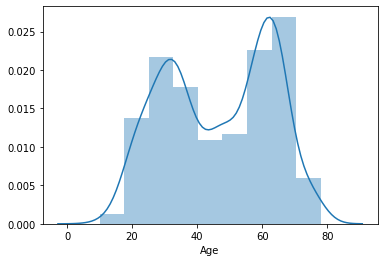

In [21]:
sns.distplot(train_pd.Age, bins=9)

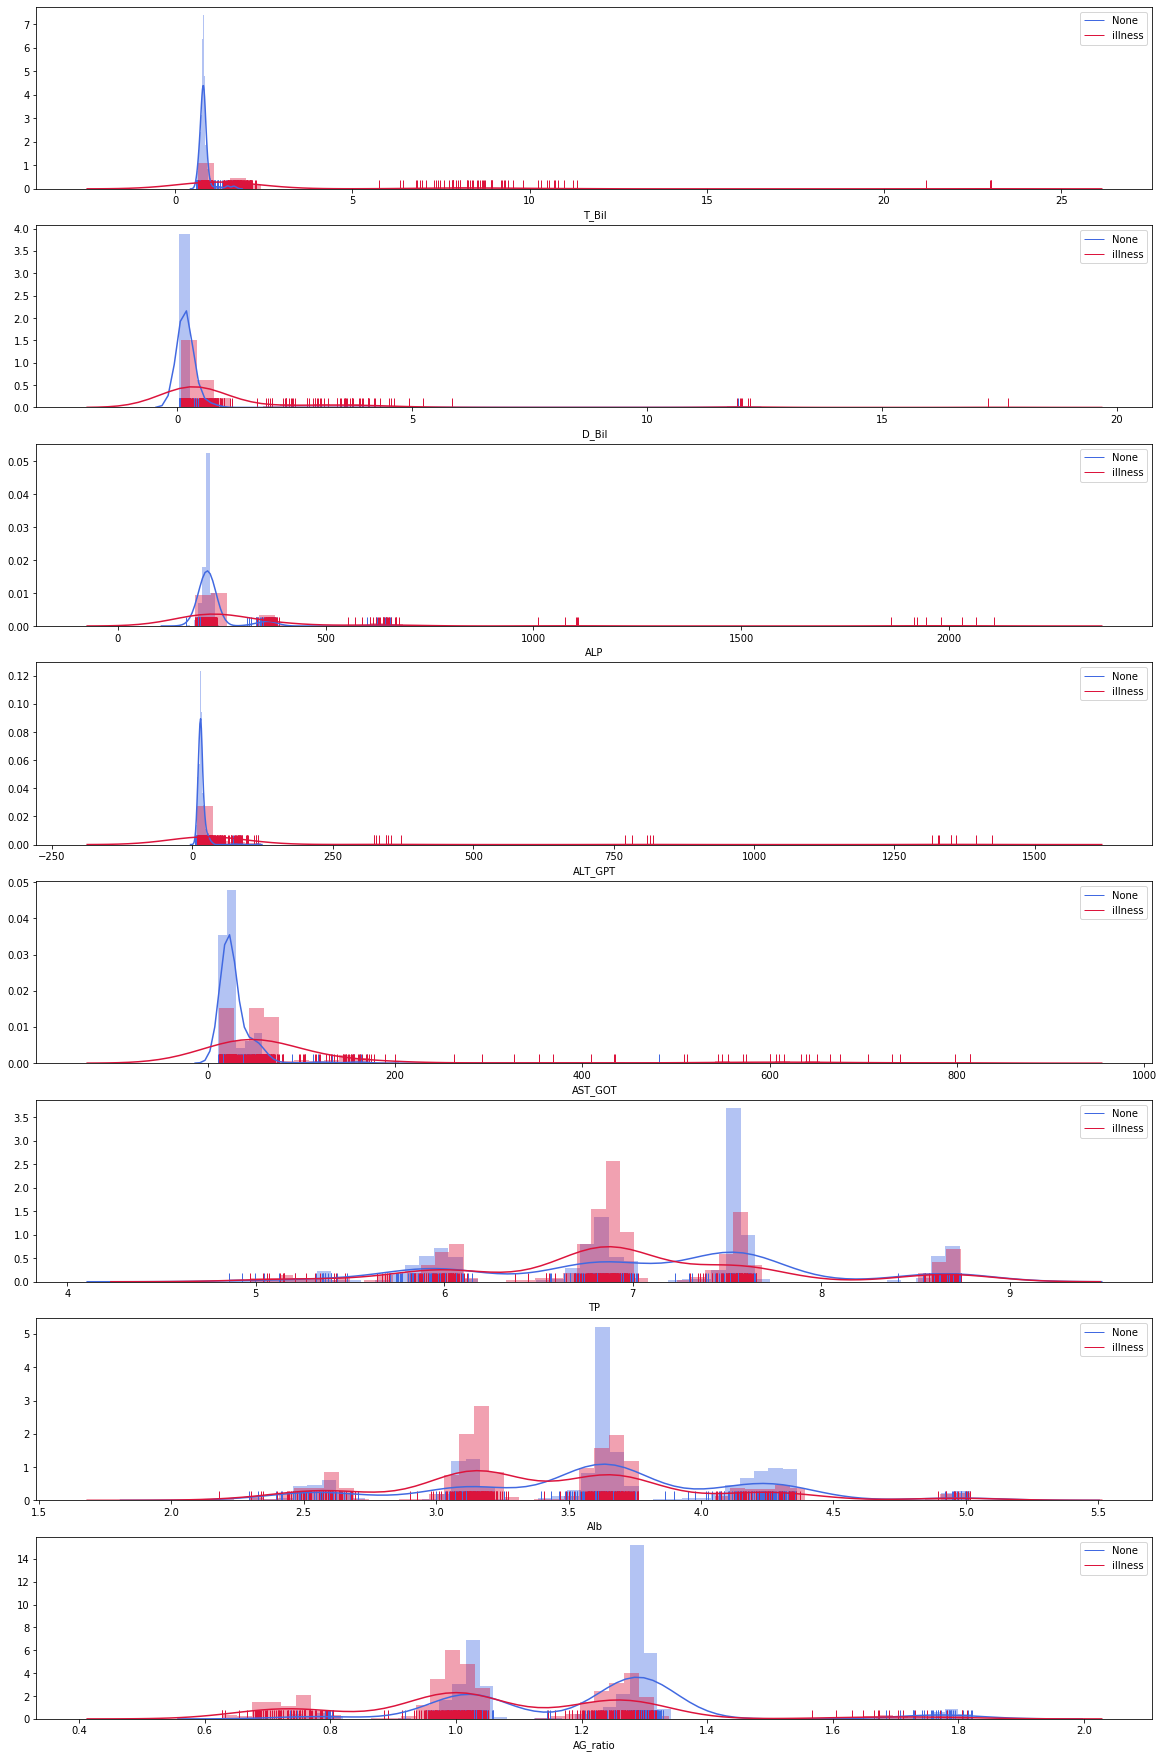

In [22]:
# 特徴量ごとに目的変数の分布を可視化
tr_features = train_pd[['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio']].columns

legend = ['None', 'illness']
plt.figure(figsize=(20, 32 * 4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(train_pd[tr_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_pd[col][train_pd.disease == 0], bins=50, color='royalblue', rug=True)
    sns.distplot(train_pd[col][train_pd.disease == 1], bins=50, color='crimson', rug=True)
    plt.legend(legend)

In [23]:
train_pd0 = train_pd[:][train_pd.disease == 0]
train_pd1 = train_pd[:][train_pd.disease == 1]

In [24]:
train_pd0.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
7,61,Male,0.785634,0.163831,217.508493,13.246081,23.332810,6.806820,3.648084,1.296773,0
10,39,Male,0.728903,0.134428,358.069584,13.159803,25.933828,5.709329,2.605893,1.017509,0


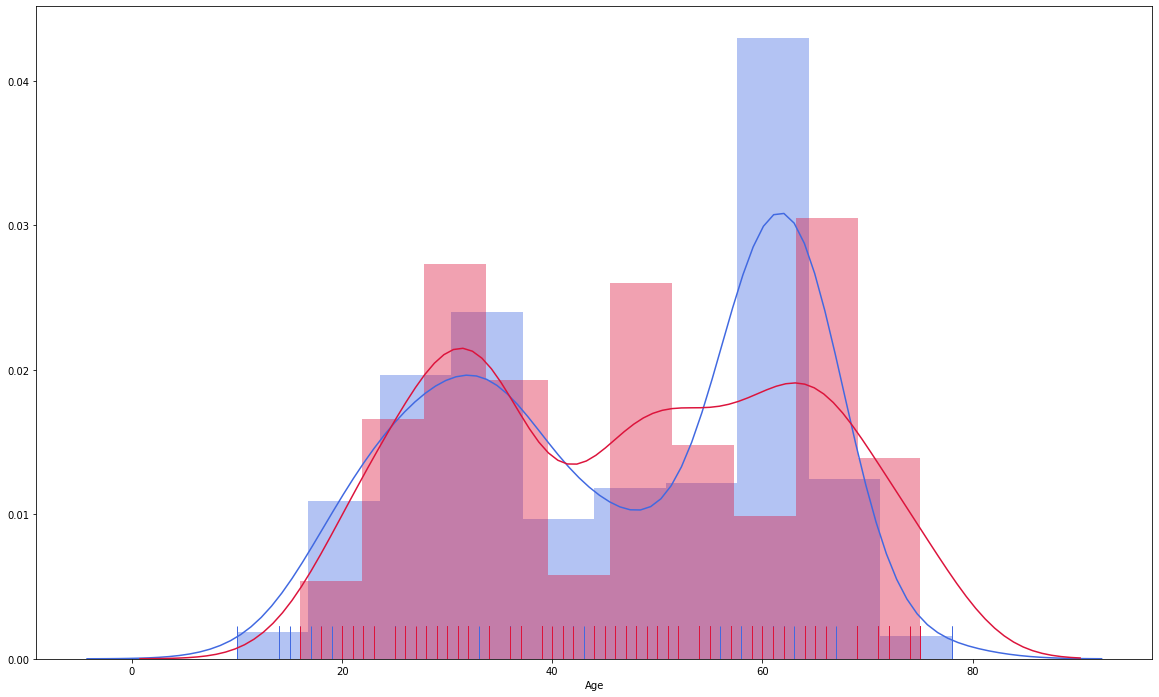

In [25]:
# 年齢
plt.figure(figsize=(20, 12))
sns.distplot(train_pd0.Age, bins=10, color='royalblue', rug=True)
sns.distplot(train_pd1.Age, bins=10, color='crimson', rug=True)

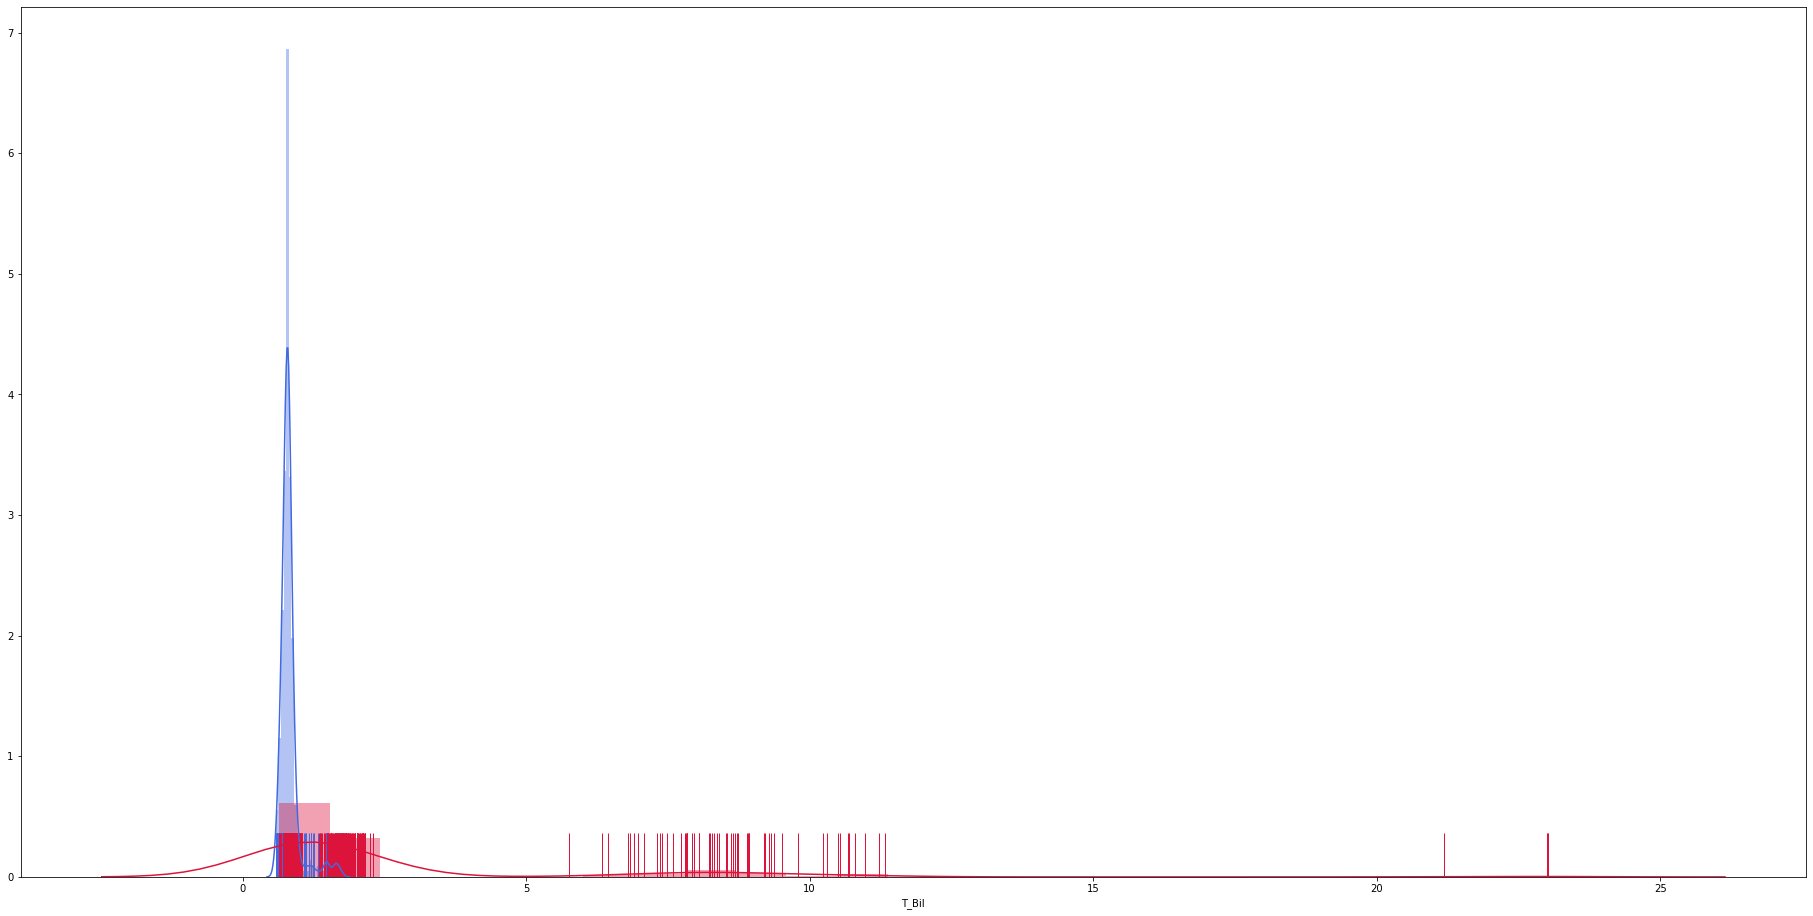

In [26]:
# 総ビリルビン (Total Bilirubin)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.T_Bil, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.T_Bil, bins=25, color='crimson', rug=True)

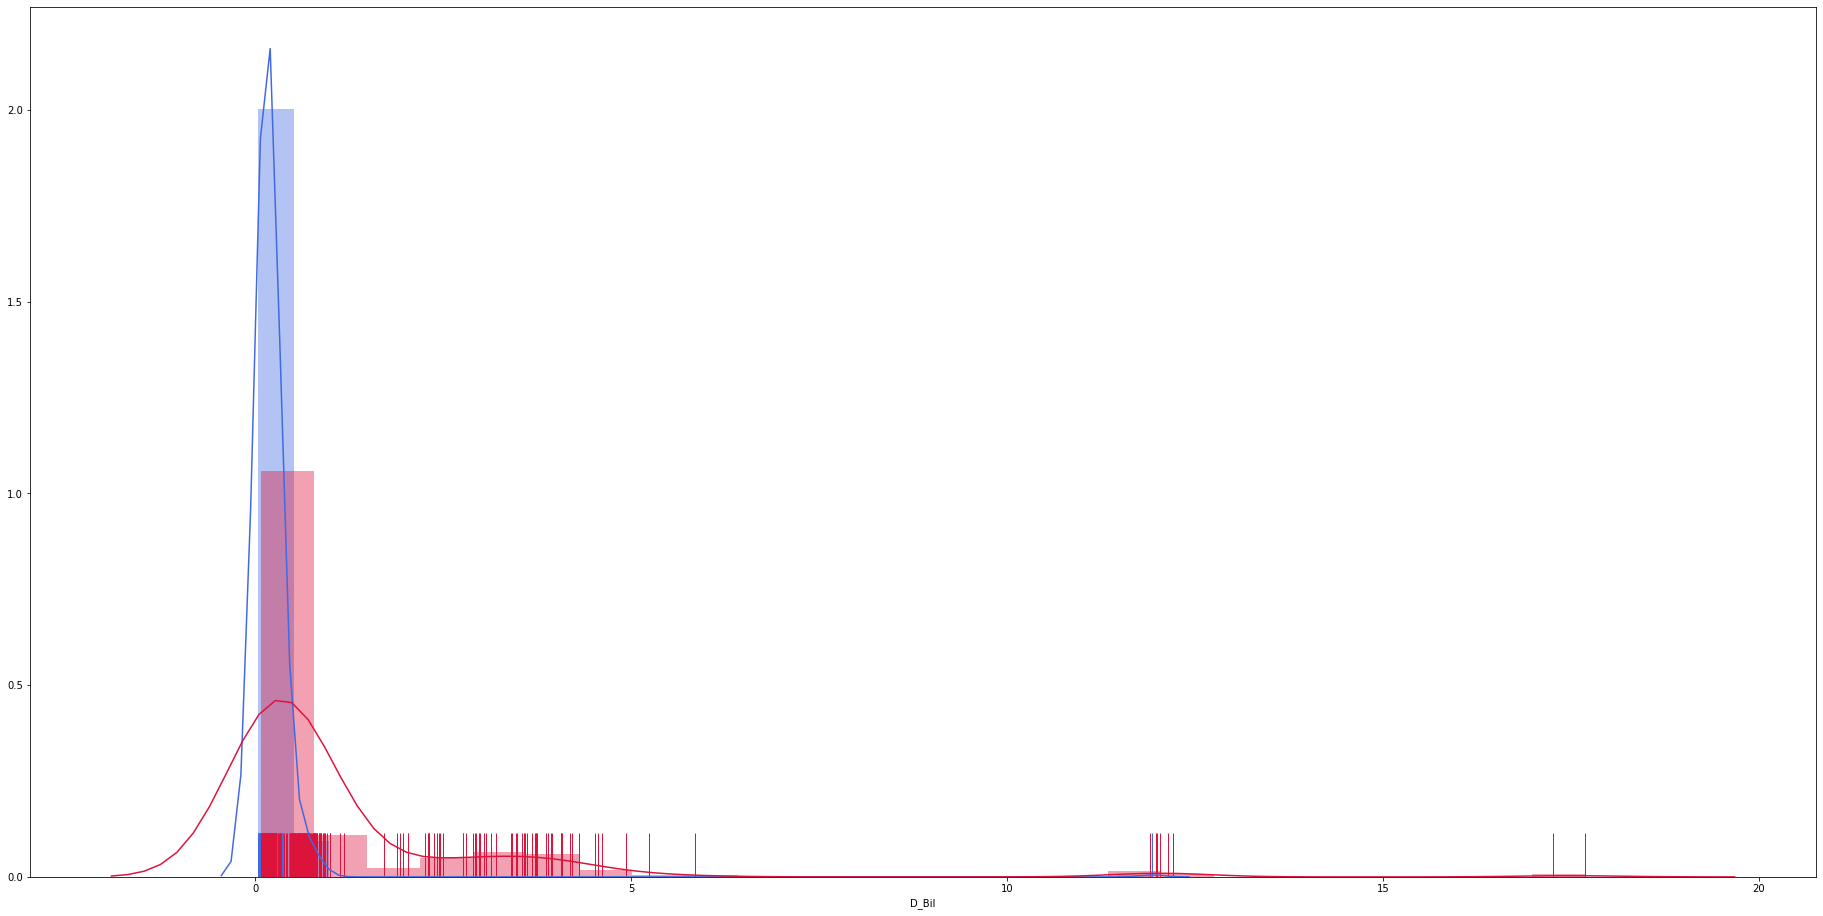

In [27]:
# 直接ビリルビン (Direct Bilirubin)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.D_Bil, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.D_Bil, bins=25, color='crimson', rug=True)

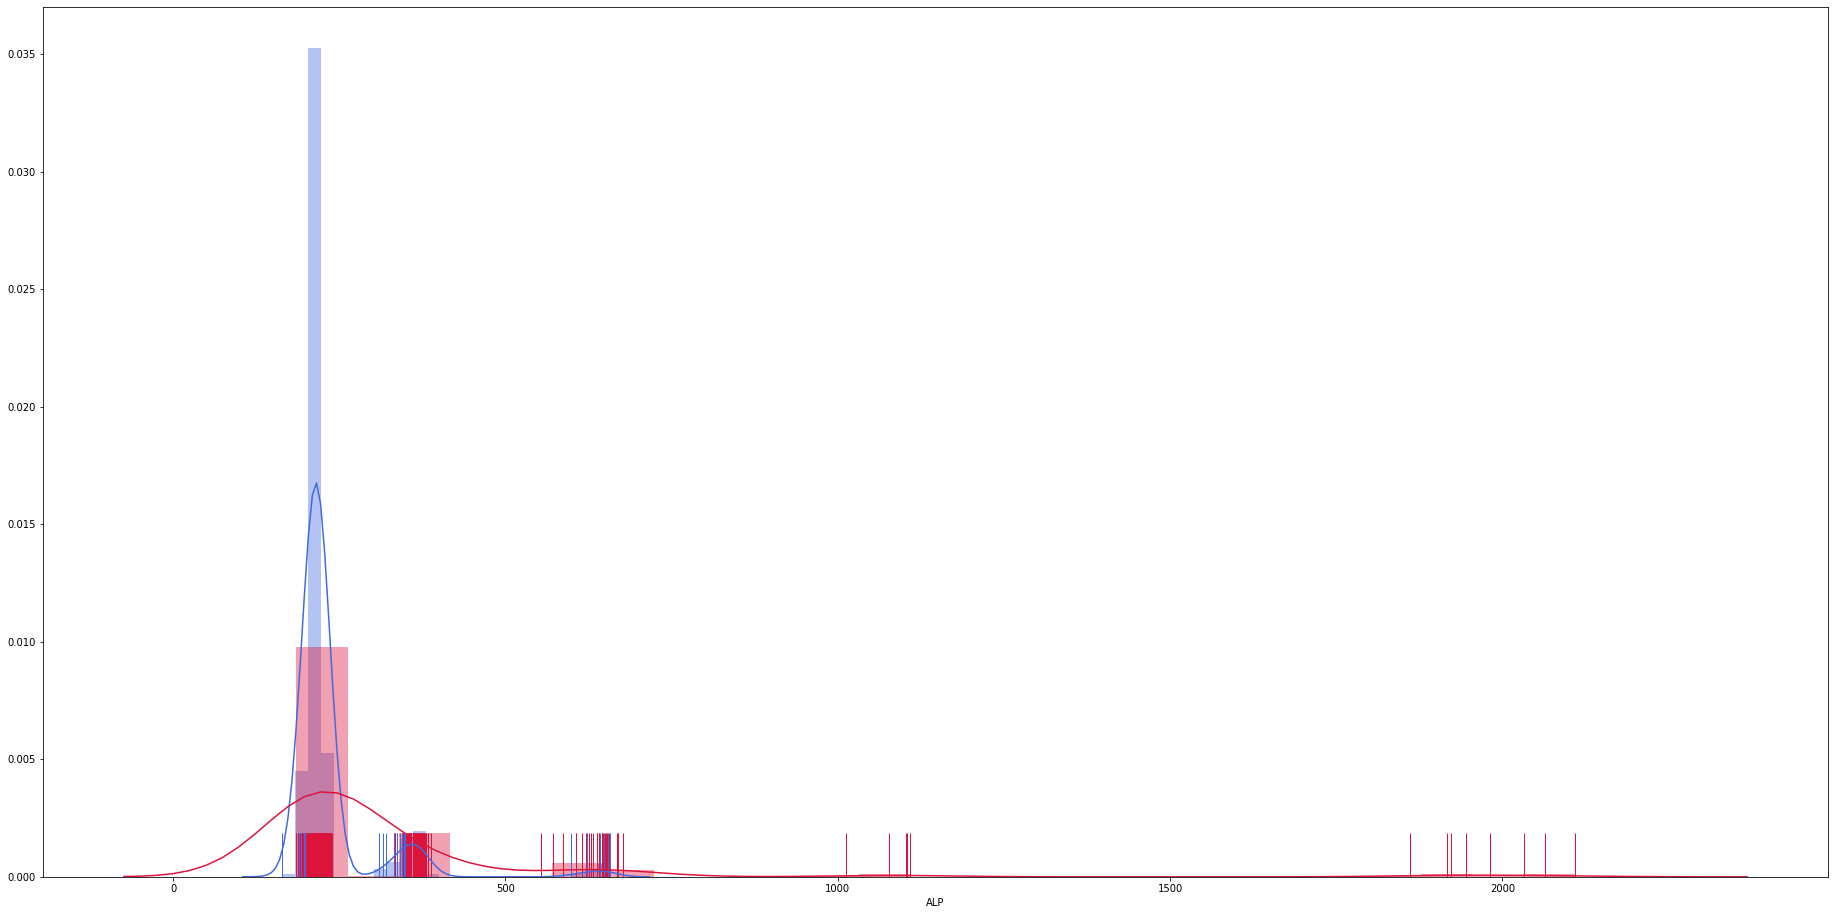

In [28]:
#  アルカリフォスファター ゼ (Alkaline Phosphotase)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.ALP, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.ALP, bins=25, color='crimson', rug=True)

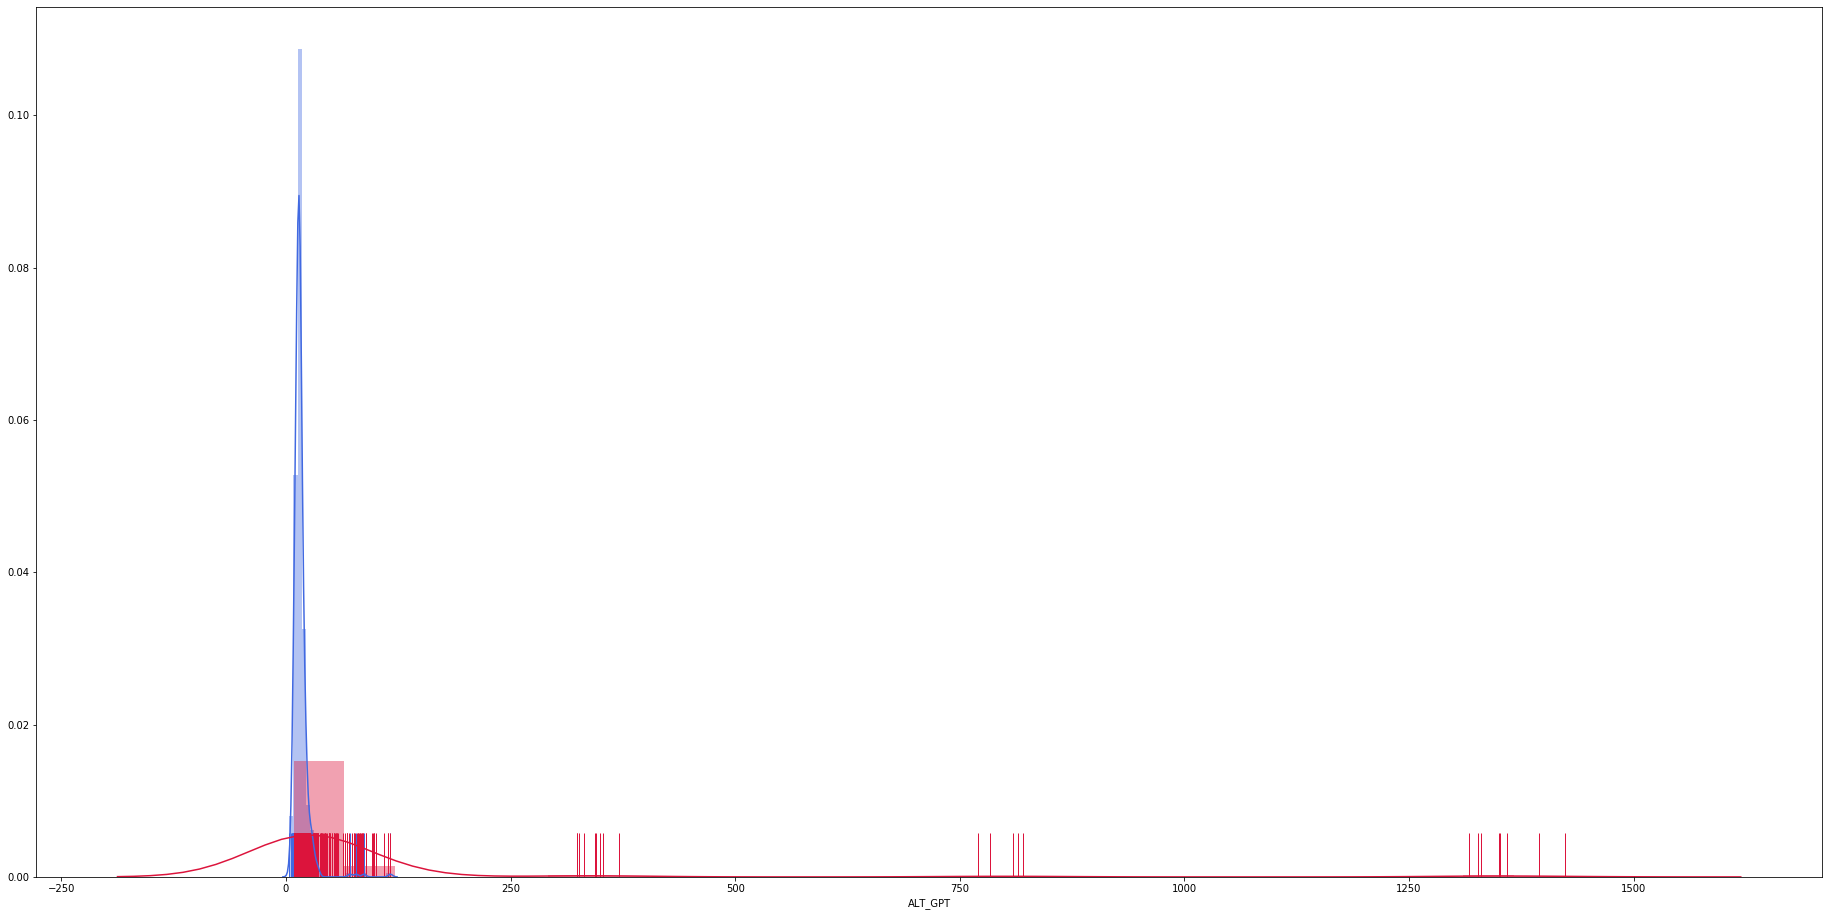

In [29]:
#  アラニンアミノトランスフェラーゼ (Alanine Transaminase)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.ALT_GPT, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.ALT_GPT, bins=25, color='crimson', rug=True)

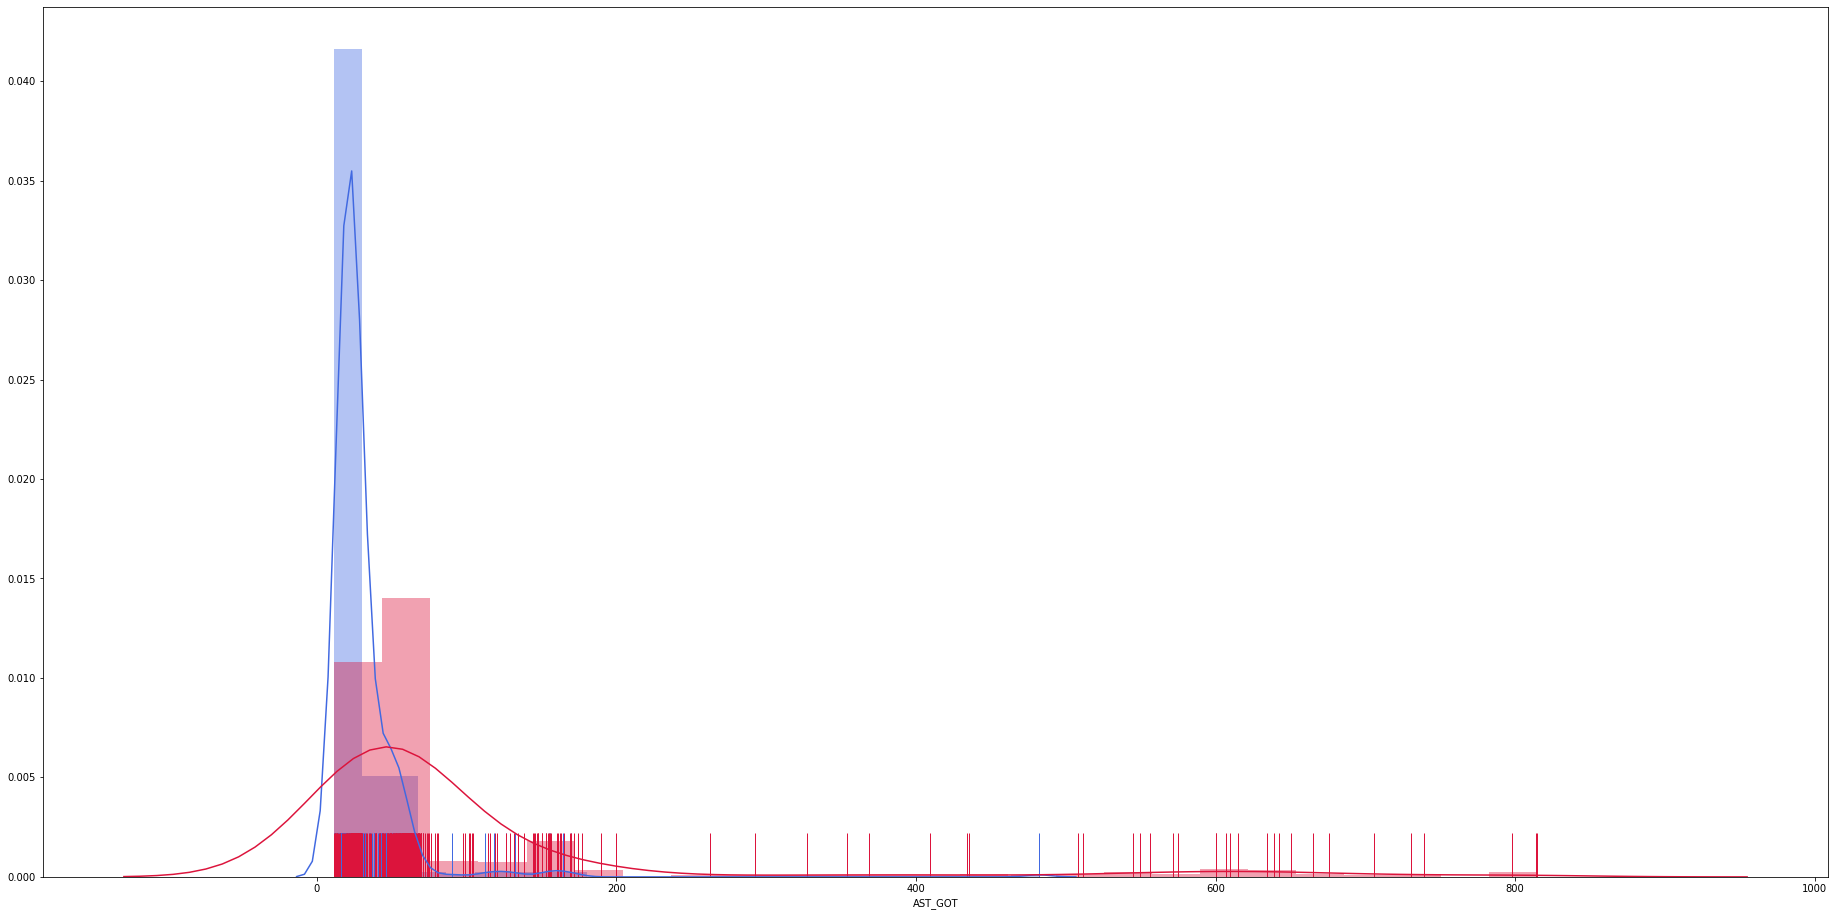

In [30]:
#  アスパラギン酸アミノトランスフェラーゼ (Aspartate Aminotransferase)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.AST_GOT, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.AST_GOT, bins=25, color='crimson', rug=True)

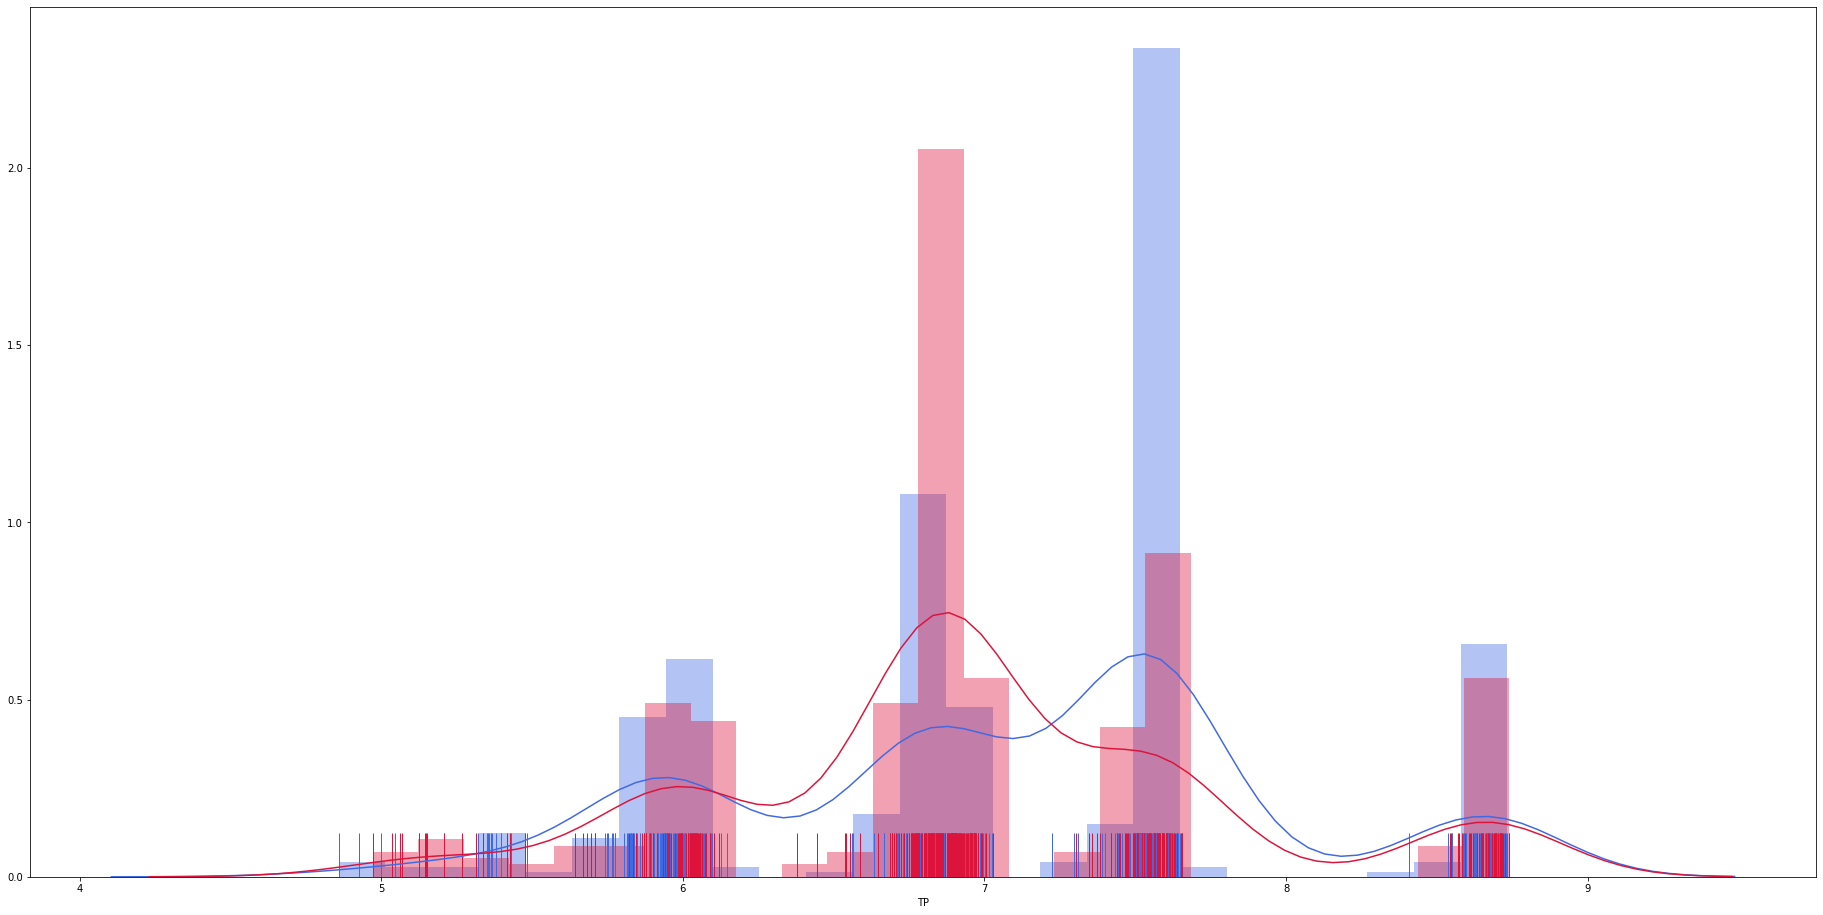

In [31]:
#  総タンパク (Total Protiens)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.TP, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.TP, bins=25, color='crimson', rug=True)

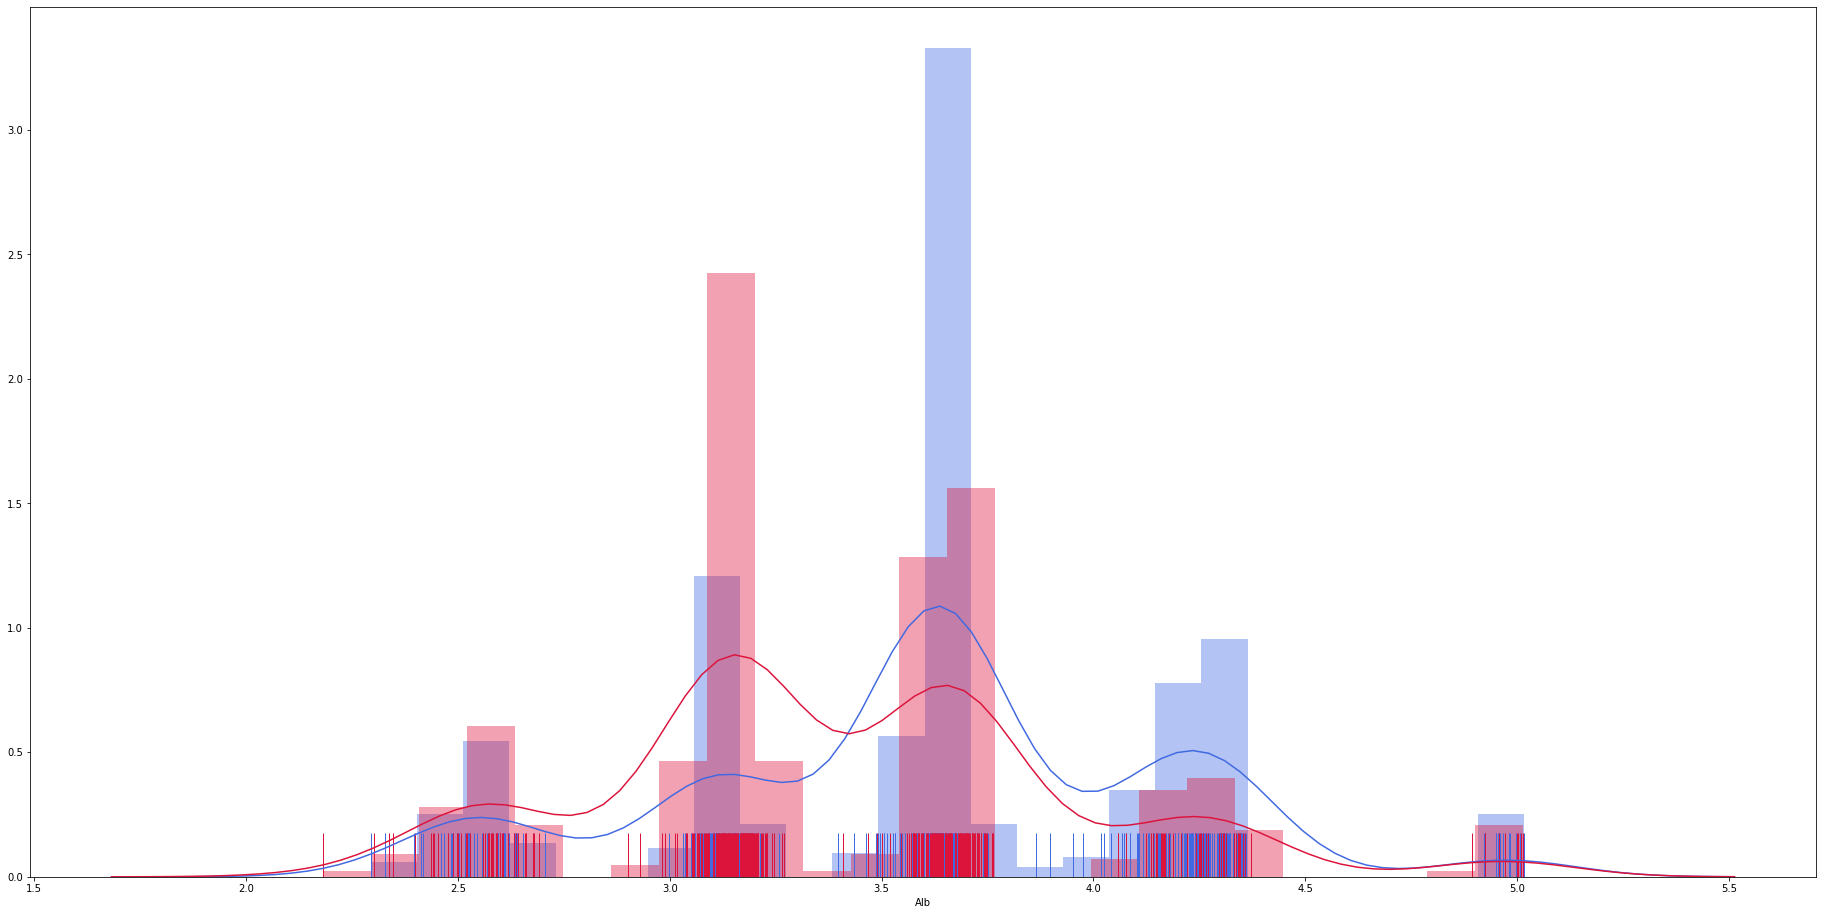

In [32]:
#  アルブミン (Albumin)
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.Alb, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.Alb, bins=25, color='crimson', rug=True)

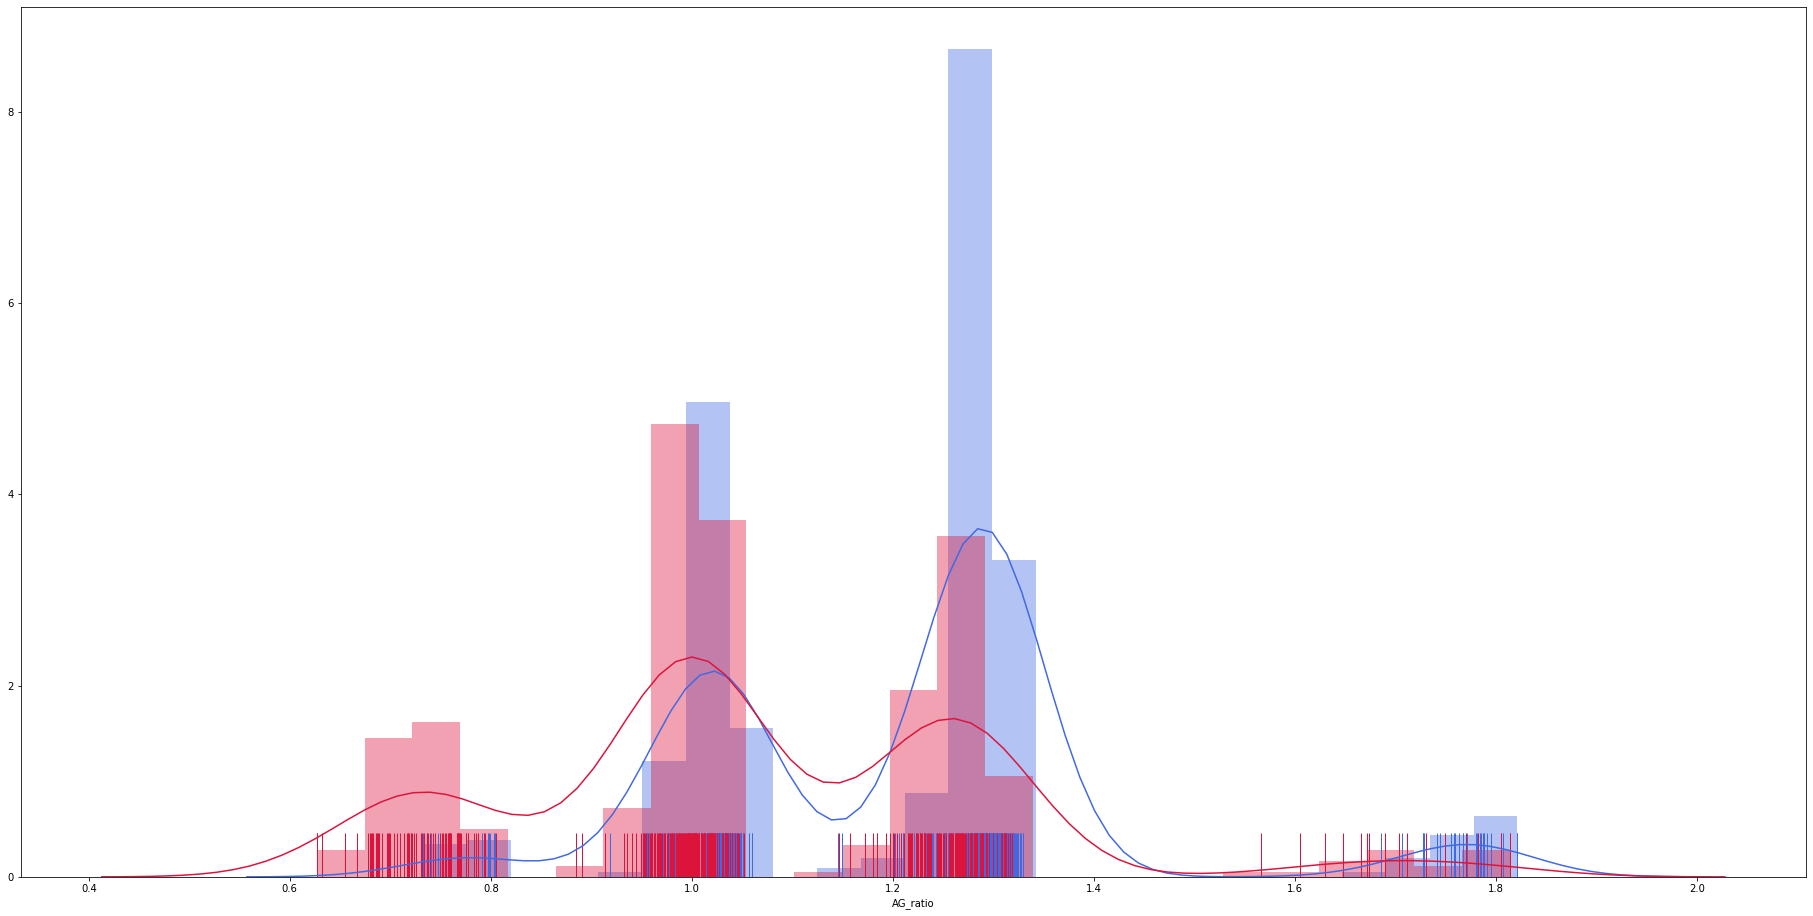

In [33]:
#  アルブミン/グロブリン比
plt.figure(figsize=(32, 16))
sns.distplot(train_pd0.AG_ratio, bins=25, color='royalblue', rug=True)
sns.distplot(train_pd1.AG_ratio, bins=25, color='crimson', rug=True)

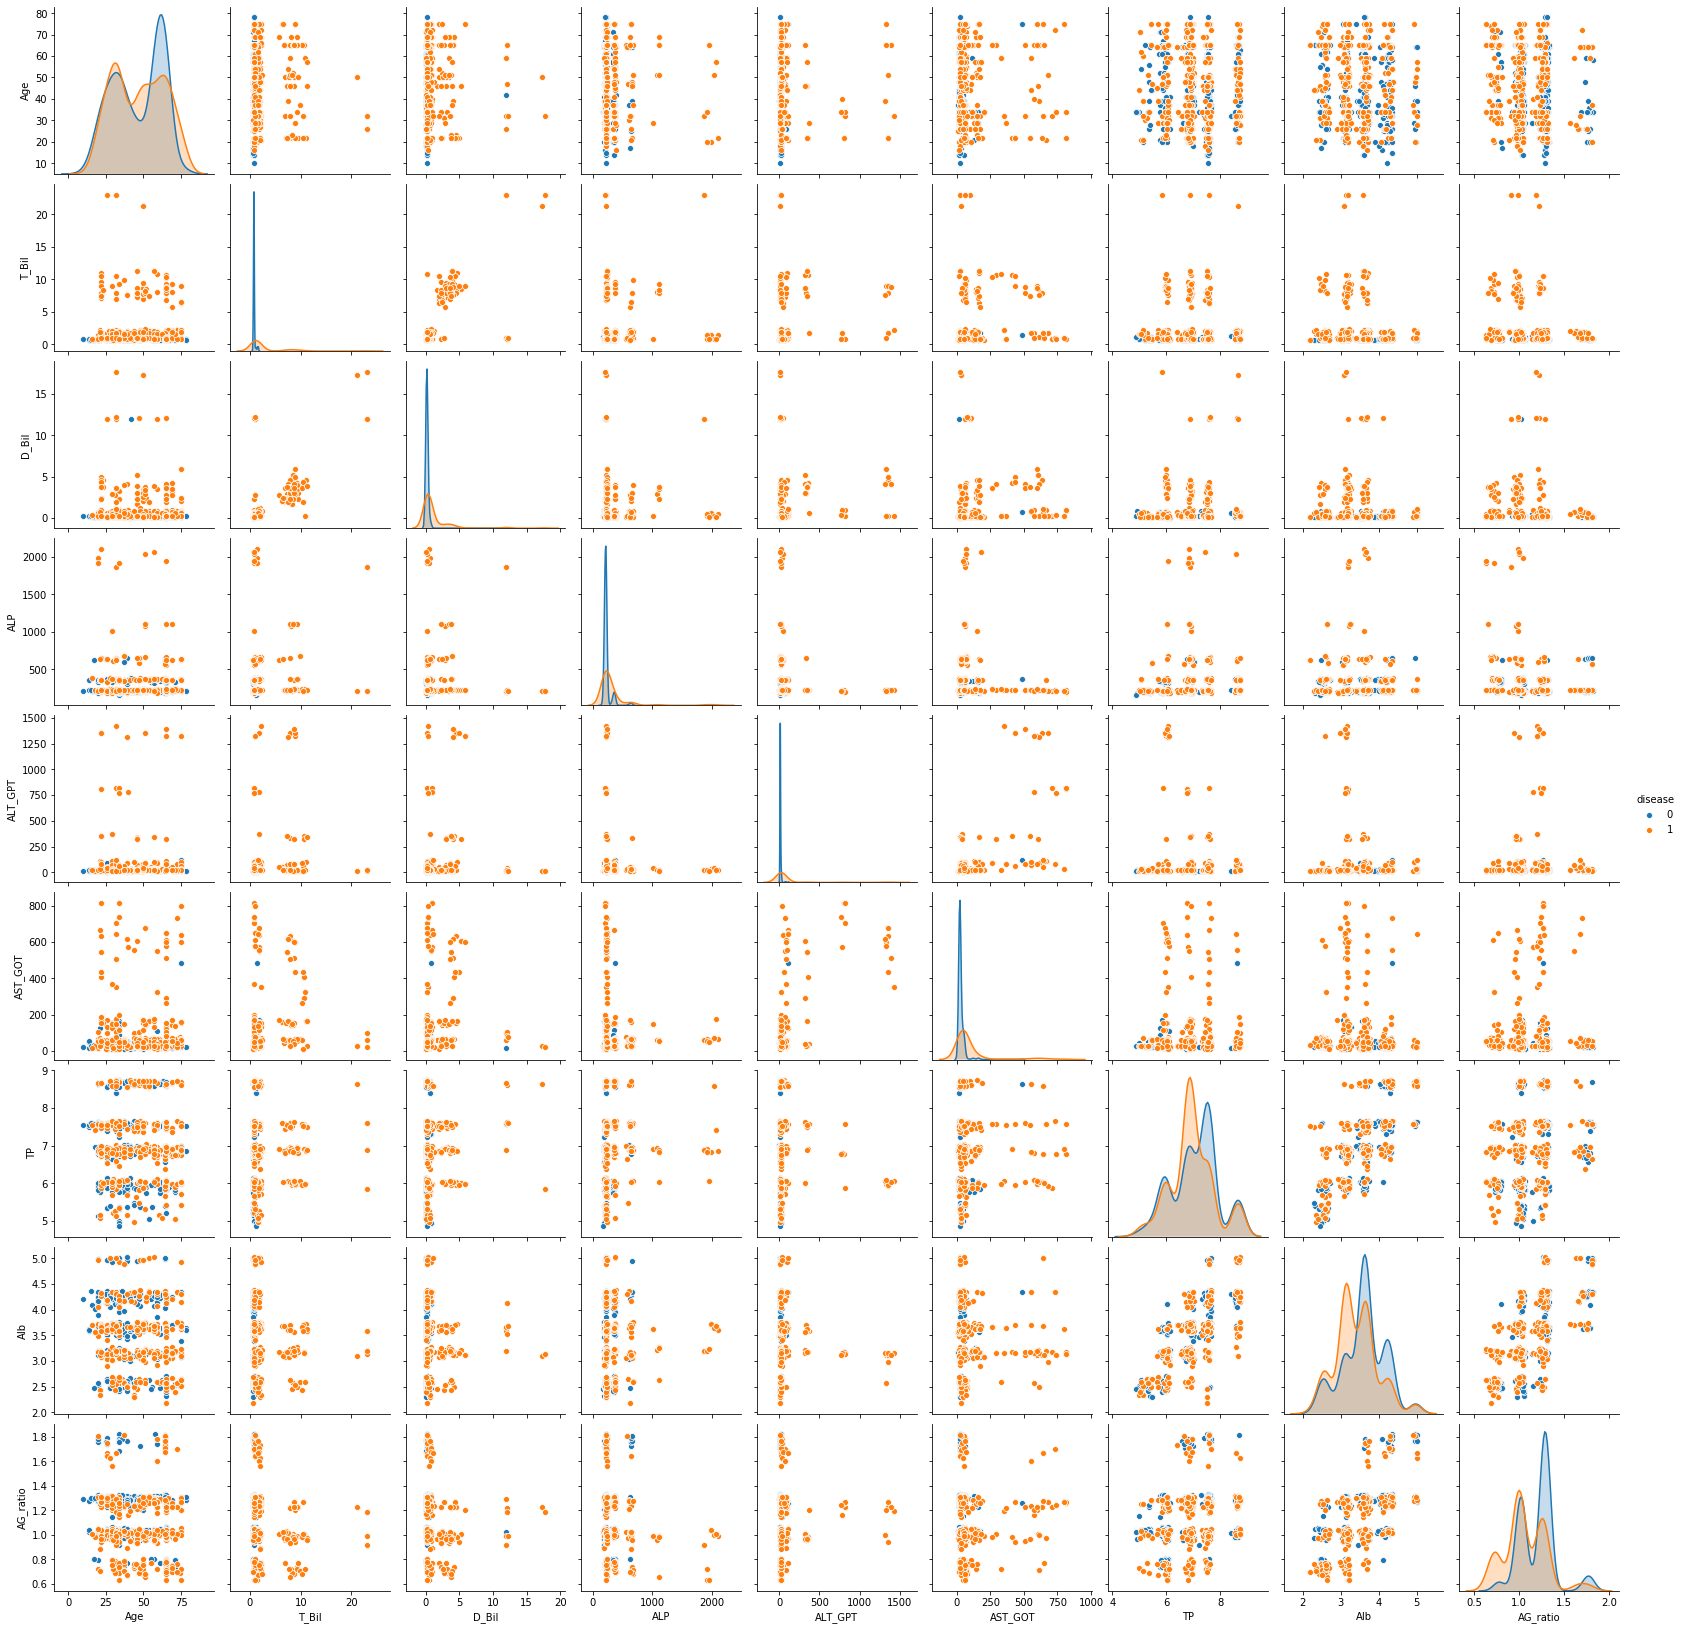

In [34]:
sns.pairplot(train_pd, hue='disease', hue_order=[0, 1]).savefig('seaborn_pairplot.png')

In [35]:
train_pd0.corr()[train_pd0.corr() > 0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,1.000000,0.642218,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,0.642218,1.000000,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.760248,0.330149,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,0.760248,1.000000,0.610435,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,0.330149,0.610435,1.000000,NaN
disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
train_pd0.corr()[train_pd0.corr() < -0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
train_pd1.corr()[train_pd1.corr() > 0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,1.000000,0.755519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,0.755519,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,1.000000,0.645561,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,0.645561,1.000000,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,0.683900,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,0.6839,1.000000,0.573537,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573537,1.000000,NaN
disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
train_pd1.corr()[train_pd1.corr() < -0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
chv.check_miss_value(train_pd)

C:\Users\owner\codexa\600_SIGNATE\002_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
Age,0,0.0
Gender,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
ALP,0,0.0
ALT_GPT,0,0.0
AST_GOT,0,0.0
TP,0,0.0
Alb,0,0.0
AG_ratio,0,0.0


## Trainデータ編集

In [40]:
train_cp = train_pd.copy()

In [41]:
train_cp = pd.get_dummies(train_cp, drop_first=True, columns=['Gender'])

In [42]:
train_cp.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Gender_Male
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,0


In [43]:
train_cp[['T_Bil', 'D_Bil', 'TP', 'Alb', 'AG_ratio']] = train_cp[['T_Bil', 'D_Bil', 'TP', 'Alb', 'AG_ratio']].astype('float16')

In [44]:
train_cp[['ALP', 'ALT_GPT', 'AST_GOT']] = train_cp[['ALP', 'ALT_GPT', 'AST_GOT']].astype('float32')

In [45]:
train_cp['Age'] = train_cp['Age'].astype('int16')

In [46]:
train_cp = train_cp.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9]]

In [47]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          850 non-null    int16  
 1   T_Bil        850 non-null    float16
 2   D_Bil        850 non-null    float16
 3   ALP          850 non-null    float32
 4   ALT_GPT      850 non-null    float32
 5   AST_GOT      850 non-null    float32
 6   TP           850 non-null    float16
 7   Alb          850 non-null    float16
 8   AG_ratio     850 non-null    float16
 9   Gender_Male  850 non-null    uint8  
 10  disease      850 non-null    int64  
dtypes: float16(5), float32(3), int16(1), int64(1), uint8(1)
memory usage: 27.5 KB


In [48]:
chv.check_miss_value(train_cp)

C:\Users\owner\codexa\600_SIGNATE\002_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
Age,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
ALP,0,0.0
ALT_GPT,0,0.0
AST_GOT,0,0.0
TP,0,0.0
Alb,0,0.0
AG_ratio,0,0.0
Gender_Male,0,0.0


In [49]:
train_cp.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607422,0.606445,272.211334,41.978474,61.018120,7.031250,3.517578,1.144531,0.825882,0.444706
std,16.453672,2.443359,1.568359,200.348511,145.927368,110.125389,0.840820,0.560059,0.227295,0.379434,0.497226
min,10.000000,0.585938,0.034851,163.261841,3.924518,11.283497,4.859375,2.181641,0.626953,0.000000,0.000000
25%,32.000000,0.781372,0.144928,213.991409,13.644659,21.239157,6.730469,3.138672,1.004883,1.000000,0.000000
50%,48.000000,0.835693,0.194092,220.092506,16.638000,27.056026,6.914062,3.621094,1.205078,1.000000,0.000000
75%,62.000000,1.197021,0.335388,229.455933,23.056081,56.461569,7.535156,3.712891,1.288086,1.000000,1.000000
max,78.000000,23.015625,17.687500,2108.483643,1423.186523,814.439392,8.742188,5.015625,1.821289,1.000000,1.000000


## Testデータ編集

In [50]:
test_cp = test_pd.copy()

In [51]:
test_cp = pd.get_dummies(test_cp, drop_first=True, columns=['Gender'])

In [52]:
test_cp.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,25,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,1
1,26,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,0
2,64,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,1
3,65,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,1
4,34,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,0


In [53]:
test_cp[['T_Bil', 'D_Bil', 'TP', 'Alb', 'AG_ratio']] = test_cp[['T_Bil', 'D_Bil', 'TP', 'Alb', 'AG_ratio']].astype('float16')

In [54]:
test_cp[['ALP', 'ALT_GPT', 'AST_GOT']] = test_cp[['ALP', 'ALT_GPT', 'AST_GOT']].astype('float32')

In [55]:
test_cp['Age'] = test_cp['Age'].astype('int16')

In [56]:
test_cp.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,25,0.801758,0.186768,214.448685,15.260516,19.496649,6.816406,3.601562,1.288086,1
1,26,0.834961,0.116455,234.136810,10.509159,16.733311,6.796875,3.111328,1.030273,0
2,64,0.791992,0.197998,216.039902,14.578304,20.695866,7.523438,3.626953,1.278320,1
3,65,0.833984,0.175781,200.901123,12.820356,20.102516,6.828125,3.626953,1.275391,1
4,34,0.690430,0.135498,208.705841,20.279018,25.096685,8.664062,4.171875,1.280273,0


In [57]:
chv.check_miss_value(test_cp)

C:\Users\owner\codexa\600_SIGNATE\002_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
Age,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
ALP,0,0.0
ALT_GPT,0,0.0
AST_GOT,0,0.0
TP,0,0.0
Alb,0,0.0
AG_ratio,0,0.0
Gender_Male,0,0.0


In [58]:
test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          350 non-null    int16  
 1   T_Bil        350 non-null    float16
 2   D_Bil        350 non-null    float16
 3   ALP          350 non-null    float32
 4   ALT_GPT      350 non-null    float32
 5   AST_GOT      350 non-null    float32
 6   TP           350 non-null    float16
 7   Alb          350 non-null    float16
 8   AG_ratio     350 non-null    float16
 9   Gender_Male  350 non-null    uint8  
dtypes: float16(5), float32(3), int16(1), uint8(1)
memory usage: 8.7 KB


In [59]:
test_cp.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,46.702857,1.631836,0.565918,282.234070,32.363522,61.545425,7.089844,3.562500,1.154297,0.814286
std,16.166318,2.857422,1.747070,201.307434,83.888397,114.916496,0.877930,0.607422,0.248047,0.389433
min,6.000000,0.609863,0.053864,175.747528,7.862773,11.278741,4.968750,2.296875,0.668945,0.000000
25%,32.000000,0.787109,0.147705,214.211426,13.551174,20.842910,6.724609,3.127930,1.008789,1.000000
50%,48.000000,0.844971,0.193848,220.738617,16.449139,25.971273,6.931641,3.621094,1.216797,1.000000
75%,61.000000,0.973877,0.236450,231.839767,22.760056,52.746082,7.553711,3.739258,1.288086,1.000000
max,75.000000,27.046875,17.703125,2101.145752,860.919067,705.777161,8.750000,5.007812,1.804688,1.000000


## pickleファイルに保存

In [60]:
train_cp.to_pickle('train.pk1')
test_cp.to_pickle('test.pk1')

In [61]:
train_cp.shape, test_cp.shape

((850, 11), (350, 10))

In [62]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          850 non-null    int16  
 1   T_Bil        850 non-null    float16
 2   D_Bil        850 non-null    float16
 3   ALP          850 non-null    float32
 4   ALT_GPT      850 non-null    float32
 5   AST_GOT      850 non-null    float32
 6   TP           850 non-null    float16
 7   Alb          850 non-null    float16
 8   AG_ratio     850 non-null    float16
 9   Gender_Male  850 non-null    uint8  
 10  disease      850 non-null    int64  
dtypes: float16(5), float32(3), int16(1), int64(1), uint8(1)
memory usage: 27.5 KB


In [63]:
test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          350 non-null    int16  
 1   T_Bil        350 non-null    float16
 2   D_Bil        350 non-null    float16
 3   ALP          350 non-null    float32
 4   ALT_GPT      350 non-null    float32
 5   AST_GOT      350 non-null    float32
 6   TP           350 non-null    float16
 7   Alb          350 non-null    float16
 8   AG_ratio     350 non-null    float16
 9   Gender_Male  350 non-null    uint8  
dtypes: float16(5), float32(3), int16(1), uint8(1)
memory usage: 8.7 KB


In [64]:
chv.check_miss_value(train_cp)

C:\Users\owner\codexa\600_SIGNATE\002_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
Age,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
ALP,0,0.0
ALT_GPT,0,0.0
AST_GOT,0,0.0
TP,0,0.0
Alb,0,0.0
AG_ratio,0,0.0
Gender_Male,0,0.0


In [65]:
chv.check_miss_value(test_cp)

C:\Users\owner\codexa\600_SIGNATE\002_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
Age,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
ALP,0,0.0
ALT_GPT,0,0.0
AST_GOT,0,0.0
TP,0,0.0
Alb,0,0.0
AG_ratio,0,0.0
Gender_Male,0,0.0


In [66]:
train_cp.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male,disease
0,59,0.787109,0.150513,220.178696,13.467617,21.729246,6.816406,3.111328,1.006836,1,0
1,69,1.003906,0.195679,221.218414,51.033463,64.752319,6.890625,3.050781,0.751465,1,1
2,65,0.657227,0.081299,320.770538,12.625011,30.613180,5.949219,2.488281,0.774902,1,0
3,65,0.906738,0.214233,369.278168,34.347599,54.510086,6.968750,3.613281,0.988281,1,1
4,22,1.735352,0.197754,222.782028,20.572891,170.010178,5.835938,3.068359,1.026367,0,0


In [67]:
test_cp.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,25,0.801758,0.186768,214.448685,15.260516,19.496649,6.816406,3.601562,1.288086,1
1,26,0.834961,0.116455,234.136810,10.509159,16.733311,6.796875,3.111328,1.030273,0
2,64,0.791992,0.197998,216.039902,14.578304,20.695866,7.523438,3.626953,1.278320,1
3,65,0.833984,0.175781,200.901123,12.820356,20.102516,6.828125,3.626953,1.275391,1
4,34,0.690430,0.135498,208.705841,20.279018,25.096685,8.664062,4.171875,1.280273,0


In [69]:
# train_cp.corr()['y']

In [70]:
test_cp.corr()[test_cp.corr() > 0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,1.000000,0.945467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,0.945467,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,1.000000,0.633067,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,0.633067,1.000000,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.721203,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,0.721203,1.000000,0.635085,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.635085,1.000000,NaN
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [71]:
test_cp.corr()[test_cp.corr() < -0.3]

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_Bil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT_GPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_GOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
